In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
from scipy import spatial

In [2]:
df = pd.read_csv('data_FSR')
df = df.drop(columns=df.columns[0])
cat2num = {'Низкий':0, "Ниже среднего":1, "Средний":2, "Выше среднего":3,"Высокий":4}
numer_columns = ['Курс', 'Преобладающие в аттестате оценки', 'Средний балл за ЕГЭ',
       'Преобладающие в университете оценки', 'Возраст', 'Рост (см)',
       'Самооценка интеллекта', 'Самооценка словарного запаса',
       'Очки для зрения', 'Относительная оценка инттеллекта',
        'Количество иностранных языков', '1 минута',
       '2 минута', '3 минута', '4 минута', '5 минута', 'Всего']
df

,Курс,Преобладающие в аттестате оценки,Средний балл за ЕГЭ,Преобладающие в университете оценки,Возраст,Рост (см),Самооценка интеллекта,Самооценка словарного запаса,Очки для зрения,Относительная оценка инттеллекта,Цвет любимой футболки,Количество иностранных языков,1 минута,2 минута,3 минута,4 минута,5 минута,Всего
0,2,5,81.000000,3,19,159,Средний,Средний,Нет,4,Розовый,3,9,9,6,3,0,27
1,2,4,76.000000,4,19,178,Средний,Средний,Нет,4,Не определился,1,7,3,7,6,8,31
2,2,5,94.750000,5,19,170,Выше среднего,Средний,Да,6,Белый,1,11,7,3,6,6,33
3,2,5,83.000000,5,19,165,Выше среднего,Выше среднего,Да,5,Белый,2,10,1,1,2,1,15
4,2,5,98.000000,5,18,180,Высокий,Высокий,Нет,5,Фиолетовый,2,6,0,3,5,0,14
5,2,4,95.300000,5,19,181,Высокий,Средний,Нет,6,Чёрный,2,7,2,5,4,5,23
6,2,5,86.300000,5,19,160,Средний,Средний,Нет,4,Красный,1,8,3,3,4,0,18
7,2,5,90.000000,5,20,170,Выше среднего,Ниже среднего,Нет,5,Чёрный,3,7,4,5,5,1,22
8,2,5,93.000000,5,19,170,Средний,Средний,Нет,4,Разноцветный,1,5,3,3,2,5,18
9,2,5,95.000000,5,19,180,Выше среднего,Средний,Нет,5,Чёрный,1,8,2,4,2,1,17


In [3]:
def plot_pie(df, column):
  fig, axes = plt.subplots(figsize=(17,17))
  if df[column].value_counts().shape[0]>10:
    colormap='tab20'
  else:
    colormap='Set2'
  df[column].value_counts().plot.pie(colormap=colormap,autopct='%1.0f%%',
                                                    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
                                                  textprops={'size': 'x-large'}, ylabel='')
  axes.set_title(column, fontsize=33)
  plt.savefig(column+'.png')
  plt.show()

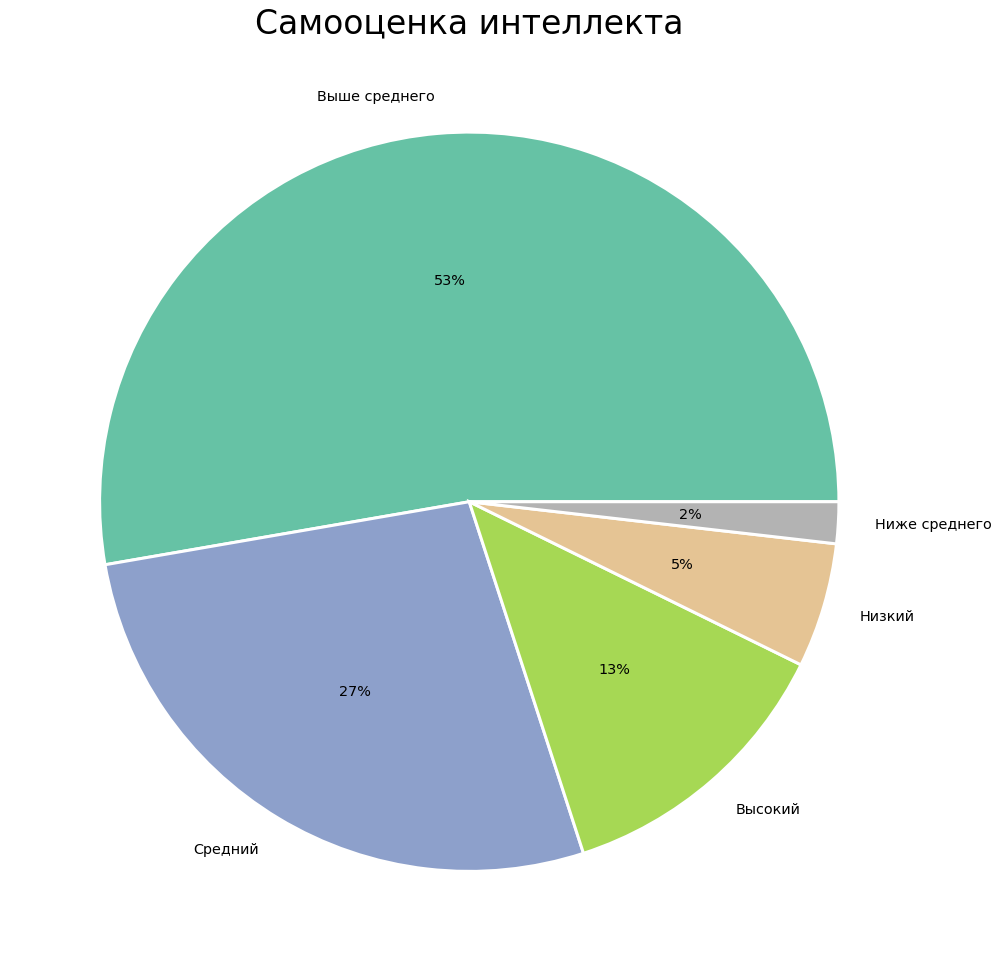

In [4]:
plot_pie(df,"Самооценка интеллекта")

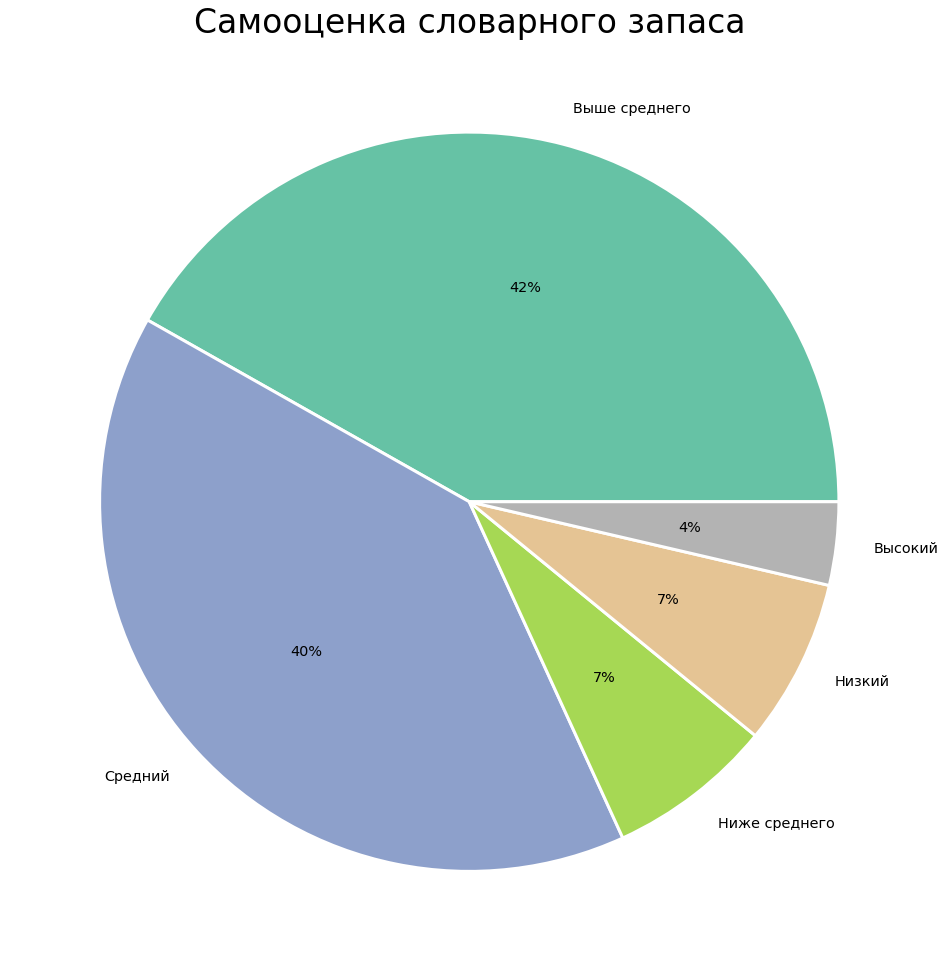

In [5]:
plot_pie(df,"Самооценка словарного запаса")

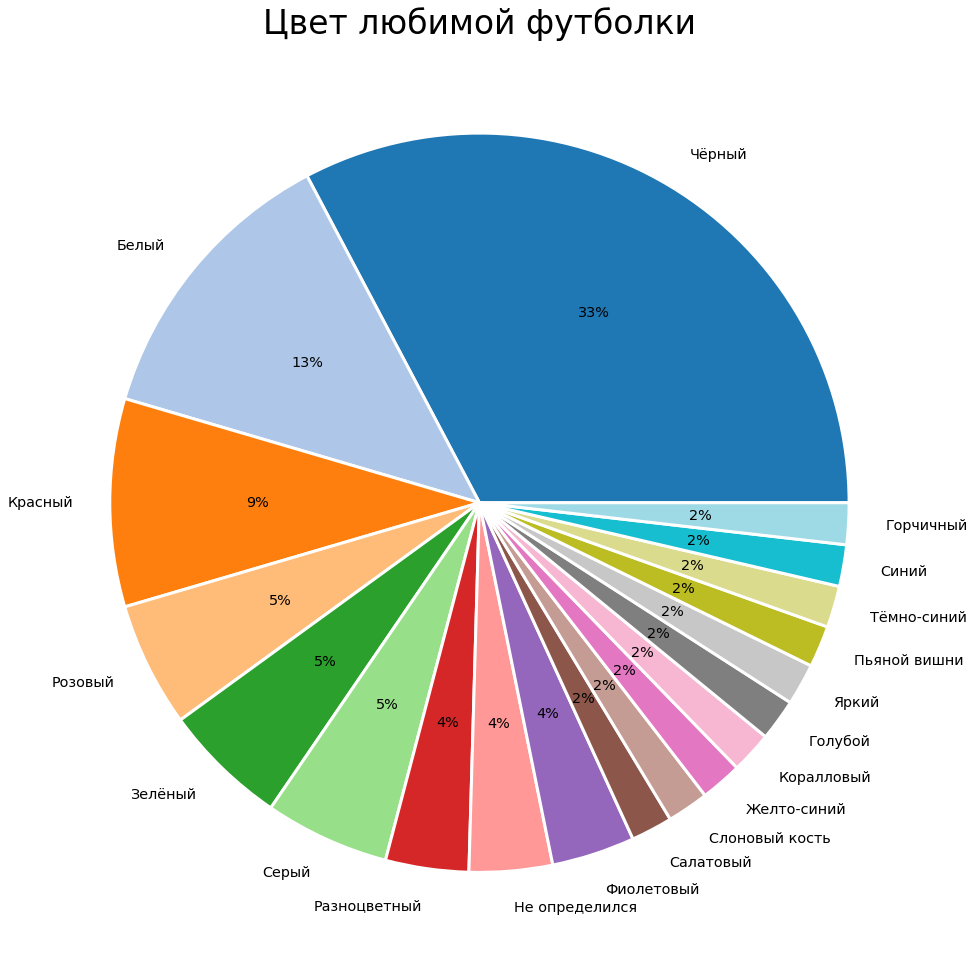

In [6]:
plot_pie(df, 'Цвет любимой футболки')

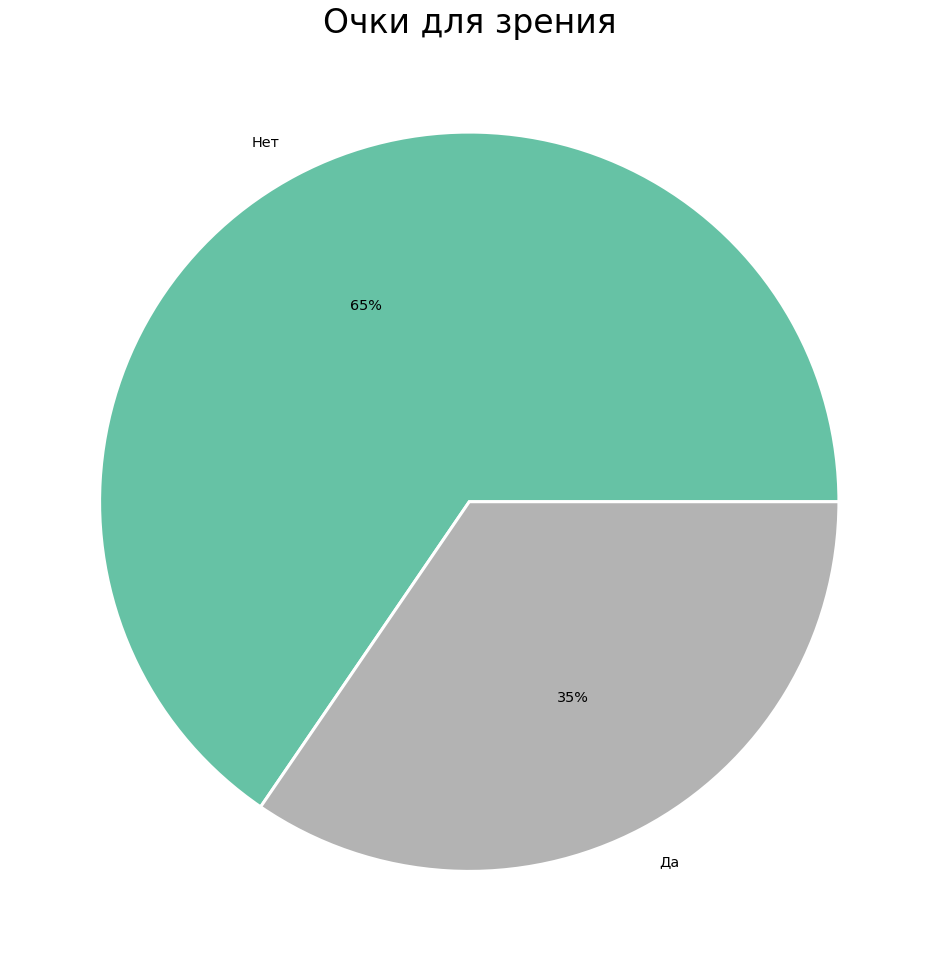

In [7]:
plot_pie(df, 'Очки для зрения')

In [8]:
df['Очки для зрения']= df['Очки для зрения'].replace({'Нет':0, 'Да':1})
df['Самооценка интеллекта'] = df['Самооценка интеллекта'].map(cat2num)
df['Самооценка словарного запаса'] = df['Самооценка словарного запаса'].map(cat2num)

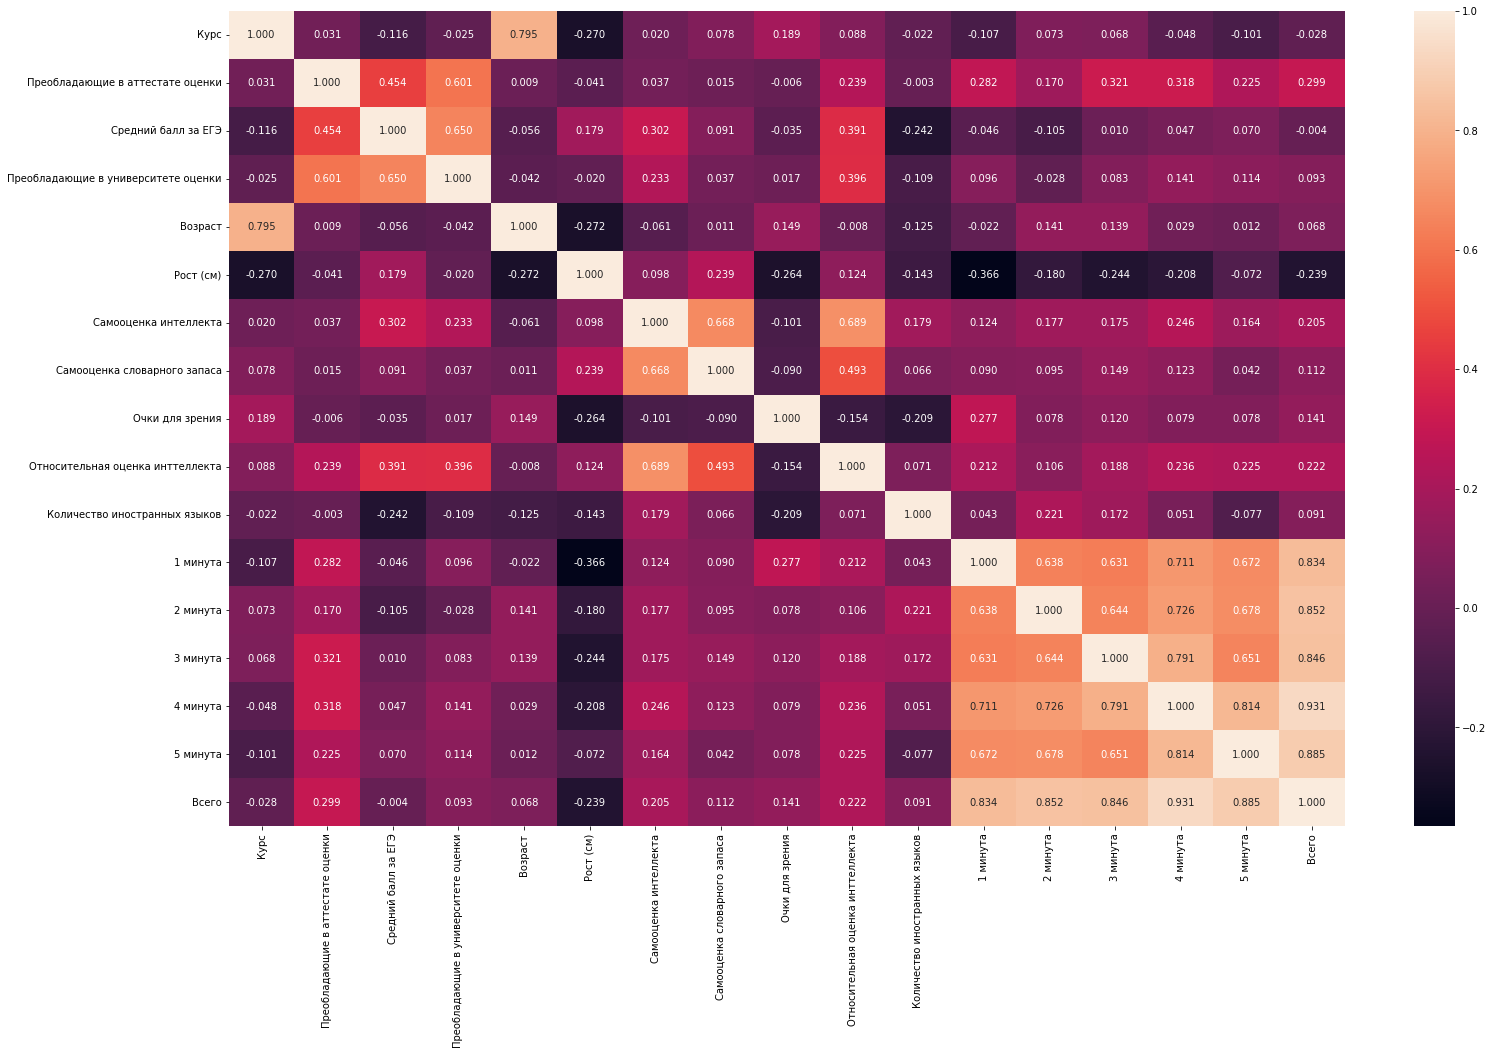

In [9]:
fig, axes = plt.subplots(figsize=(25,15))

sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.3f')
plt.savefig('corr-matrix.png',dpi=300)
plt.show()

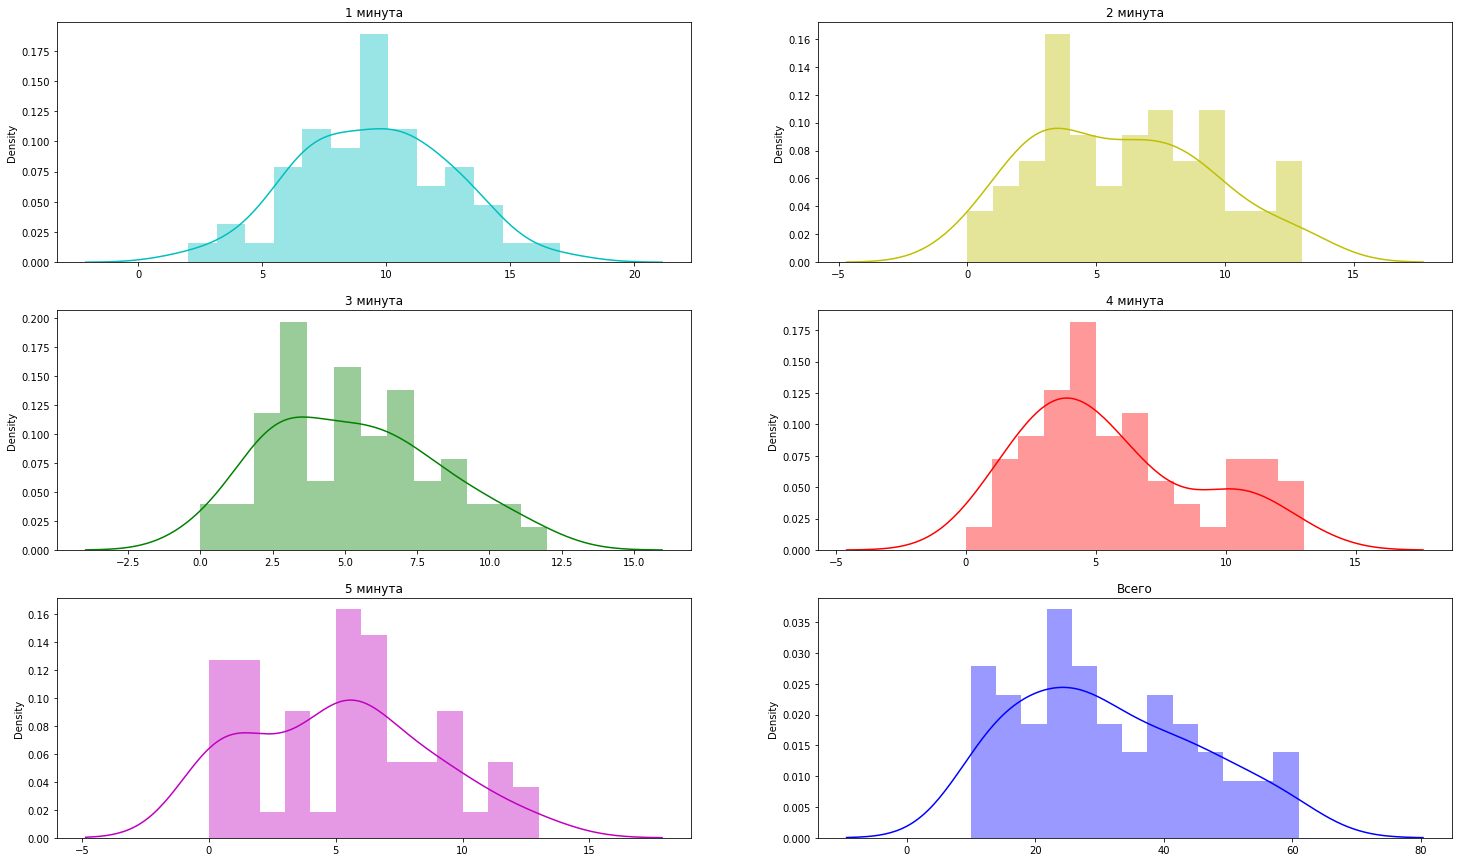

In [10]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

fig, axes = plt.subplots(3,2,figsize=(25,15))
c=0
colors = ['c','y','g','r','m','b']
mins = ['1 минута','2 минута','3 минута','4 минута','5 минута',"Всего"]
for i in range(3):
  for j in range(2):
    sns.distplot(df[mins[c]].values, ax=axes[i][j], bins=13, color=colors[c])
    axes[i][j].set_title(mins[c])
    c+=1
plt.savefig('word-dist.png')

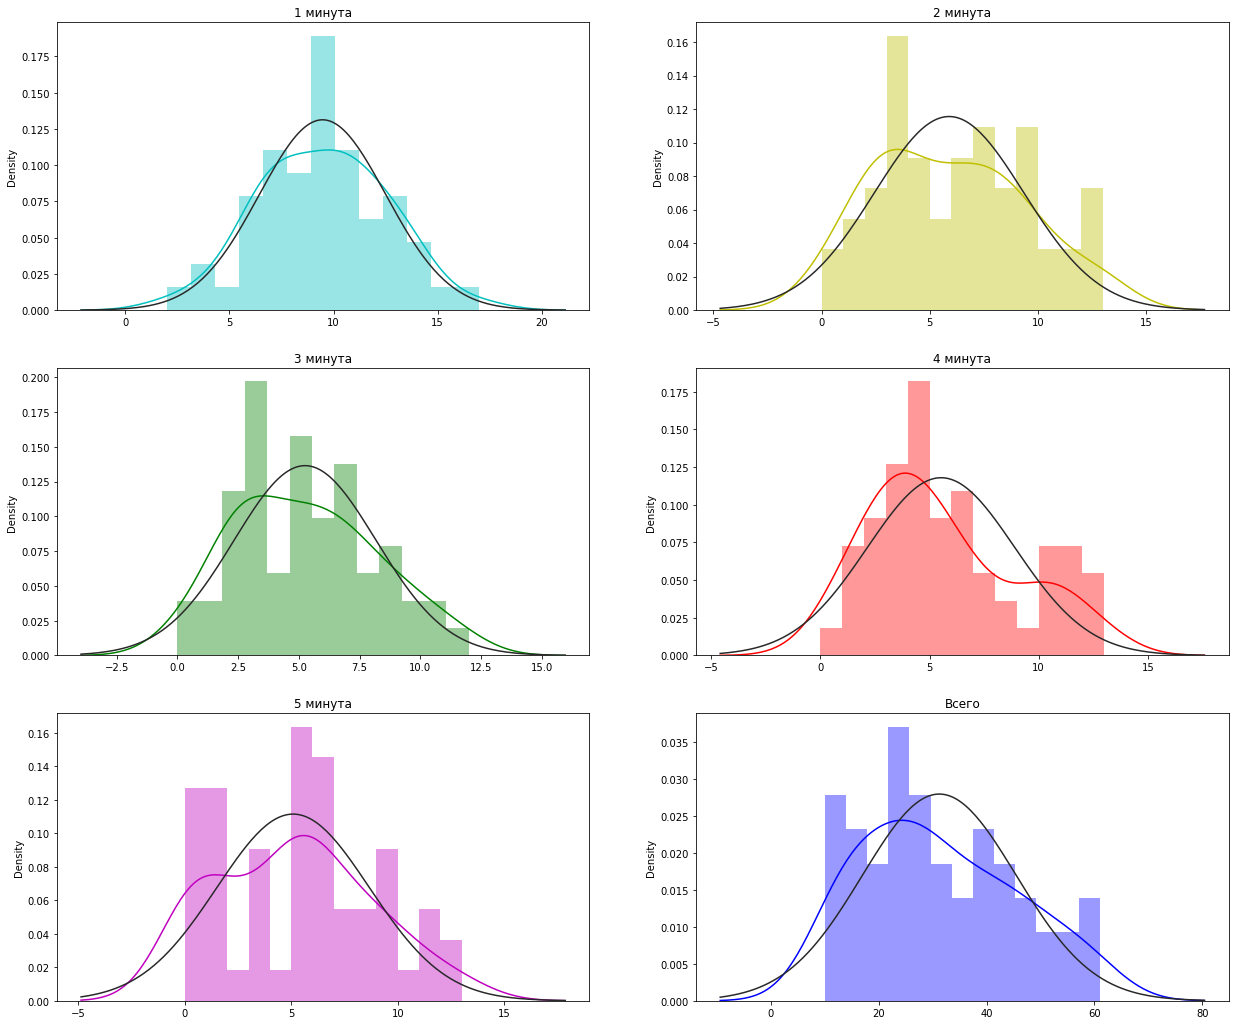

In [11]:
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import norm

fig, axes = plt.subplots(3,2,figsize=(21,18))
c=0
colors = ['c','y','g','r','m','b']
mins = ['1 минута','2 минута','3 минута','4 минута','5 минута',"Всего"]
for i in range(3):
  for j in range(2):
    sns.distplot(df[mins[c]].values, ax=axes[i][j], bins=13, color=colors[c], fit=norm)
    axes[i][j].set_title(mins[c])
    c+=1
plt.savefig('norm-w-dist.png')
plt.show()

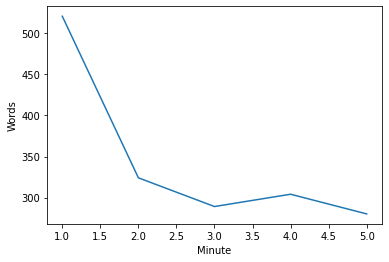

In [12]:
plt.plot(range(1,6),df.loc[:,'1 минута':'5 минута'].sum().values)
plt.xlabel('Minute')
plt.ylabel('Words')
plt.savefig('mean-w.png')

# Пункт а

In [13]:
word_list_smart = np.array(df[df['Относительная оценка инттеллекта'] == 5]['Всего'])
word_list_above_avarege = np.array(df[df['Относительная оценка инттеллекта'] == 4]['Всего'])
word_list_avarege = np.array(df[df['Относительная оценка инттеллекта'] == 3]['Всего'])

stats.f_oneway(word_list_smart,word_list_above_avarege,word_list_avarege)

F_onewayResult(statistic=0.2255758886939849, pvalue=0.7991459289100528)

In [14]:
word_list_smart = np.array(df[df['Самооценка словарного запаса'] == 4]['Всего'])
word_list_above_avarege = np.array(df[df['Самооценка словарного запаса'] == 3]['Всего'])
word_list_avarege = np.array(df[df['Самооценка словарного запаса'] == 2]['Всего'])

stats.f_oneway(word_list_smart,word_list_above_avarege,word_list_avarege)

F_onewayResult(statistic=0.06291944006622517, pvalue=0.9391034483084442)

In [15]:
word_list_smart = np.array(df[df['Преобладающие в университете оценки'] == 5]['Всего'])
word_list_above_avarege = np.array(df[df['Преобладающие в университете оценки'] == 4]['Всего'])
word_list_avarege = np.array(df[df['Преобладающие в университете оценки'] == 3]['Всего'])

stats.f_oneway(word_list_smart,word_list_above_avarege,word_list_avarege)

F_onewayResult(statistic=0.4081534473212355, pvalue=0.6669881856401794)

*проверка независимости*

'Преобладающие в аттестате оценки', 'Средний балл за ЕГЭ',
       'Преобладающие в университете оценки', 'Возраст', 'Рост (см)',
       'Самооценка интеллекта', 'Самооценка словарного запаса',
       'Очки для зрения', 'Относительная оценка инттеллекта'

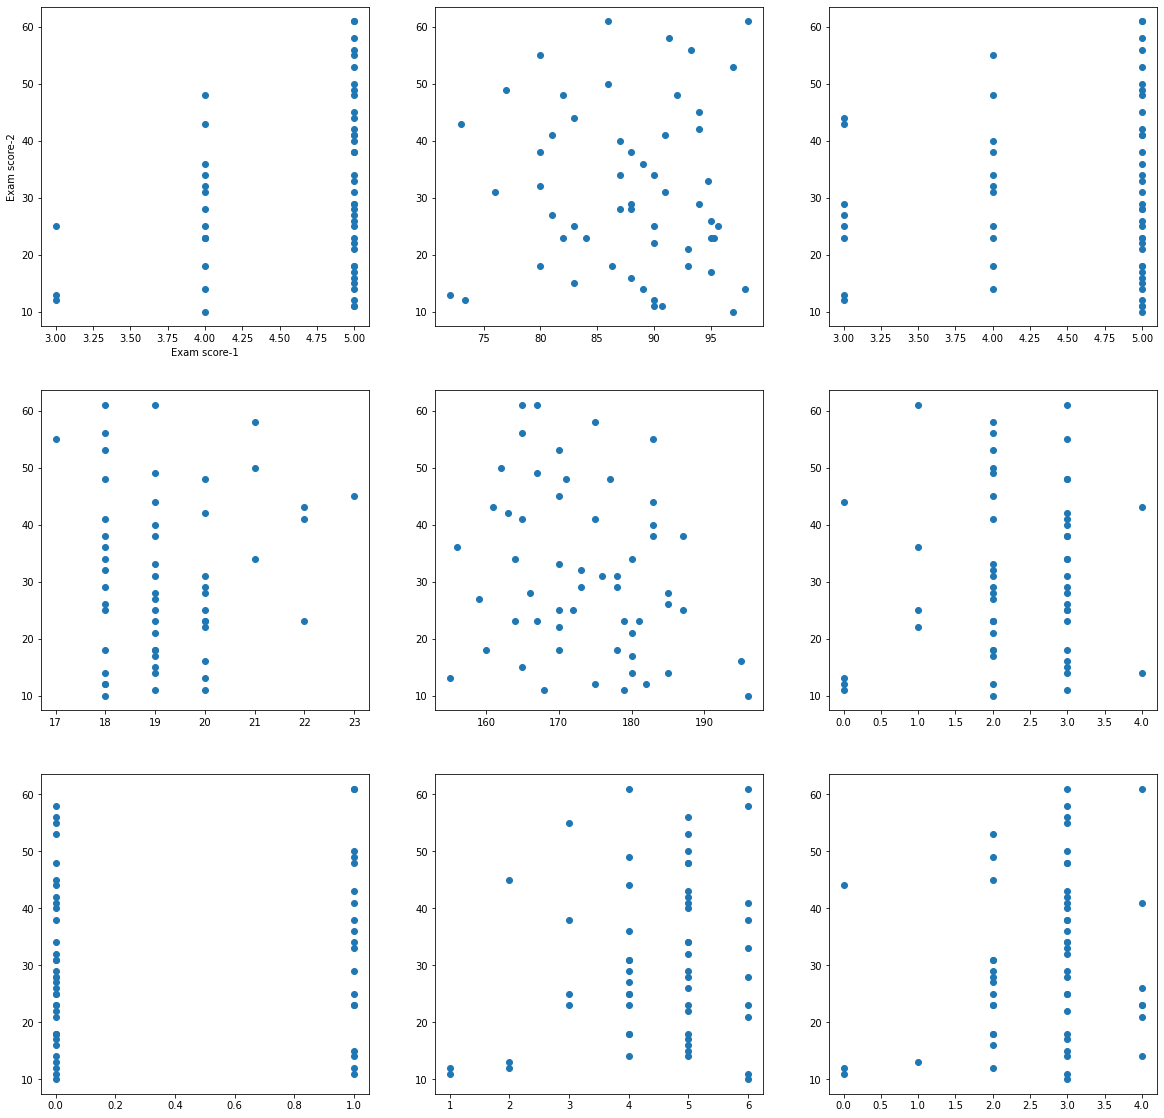

In [19]:
school_mark_list = np.array(df['Преобладающие в аттестате оценки'])
avarege_ege_list = np.array(df['Средний балл за ЕГЭ'])
most_uni_mark_list = np.array(df['Преобладающие в университете оценки'])
age_list = np.array(df['Возраст'])
hight_list = np.array(df['Рост (см)'])
self_intellect_list = np.array(df['Самооценка интеллекта'])
self_erudition_list = np.array(df['Самооценка словарного запаса'])
vision_list = np.array(df['Очки для зрения'])
relative_intellect = np.array(df['Относительная оценка инттеллекта'])

word_list = np.array(df['Всего'])

fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes[0][0].scatter(school_mark_list, word_list)
axes[0][0].set(xlabel="Exam score-1", ylabel="Exam score-2")

axes[0][1].scatter(avarege_ege_list, word_list)
axes[0][2].scatter(most_uni_mark_list, word_list)
axes[1][0].scatter(age_list, word_list)
axes[1][1].scatter(hight_list, word_list)
axes[1][2].scatter(self_erudition_list, word_list)
axes[2][0].scatter(vision_list, word_list)
axes[2][1].scatter(relative_intellect, word_list)
axes[2][2].scatter(self_intellect_list, word_list)

In [20]:
stats.pearsonr(school_mark_list, word_list)

(0.2986520112447527, 0.026773455936077183)

In [21]:
stats.pearsonr(avarege_ege_list, word_list)

(-0.004446680959116918, 0.974296483565018)

In [22]:
stats.pearsonr(most_uni_mark_list, word_list)

(0.09251893334932626, 0.5016969529601065)

In [23]:
stats.pearsonr(age_list, word_list)

(0.06768372107004761, 0.6234333557898967)

In [24]:
stats.pearsonr(hight_list, word_list)

(-0.23908698430196215, 0.07875015903052231)

In [25]:
stats.pearsonr(self_intellect_list, word_list)

(0.20458967436352182, 0.1340484575128266)

**spearman and kendalltau**

In [26]:
print(stats.spearmanr(self_erudition_list, word_list))
print(stats.kendalltau(self_erudition_list, word_list))

SpearmanrResult(correlation=0.10051338769580749, pvalue=0.4652937471848917)
KendalltauResult(correlation=0.07738036785256709, pvalue=0.46561651925116854)


In [27]:
print(stats.spearmanr(most_uni_mark_list, word_list))
print(stats.kendalltau(most_uni_mark_list, word_list))

SpearmanrResult(correlation=0.04360281851462825, pvalue=0.7519340771188135)
KendalltauResult(correlation=0.038592376251237515, pvalue=0.7226016411762826)


In [28]:
print(stats.spearmanr(self_intellect_list, word_list))
print(stats.kendalltau(self_intellect_list, word_list))

SpearmanrResult(correlation=0.17451430364459977, pvalue=0.2025534250501943)
KendalltauResult(correlation=0.14679478059637924, pvalue=0.16681363166666008)


In [501]:
print(stats.spearmanr(vision_list, word_list))
print(stats.kendalltau(vision_list, word_list))

SpearmanrResult(correlation=0.13495438453214367, pvalue=0.3259207626897602)
KendalltauResult(correlation=0.11199955200268798, pvalue=0.3213399181397919)


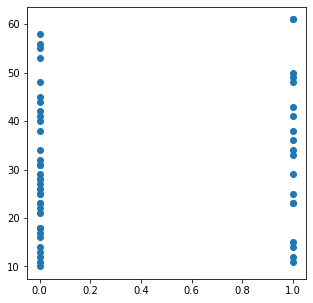

In [502]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(vision_list, word_list)

*самооценка словарного запаса*

In [503]:
print(stats.pearsonr(self_erudition_list, word_list))
print(stats.spearmanr(self_erudition_list, word_list))
print(stats.kendalltau(self_erudition_list, word_list))

(0.11241761741320272, 0.41383875148462873)
SpearmanrResult(correlation=0.10051338769580749, pvalue=0.4652937471848917)
KendalltauResult(correlation=0.07738036785256709, pvalue=0.46561651925116854)


In [504]:
spatial.distance.correlation(self_erudition_list, word_list)

0.8875823825867973

In [505]:
spatial.distance.correlation(hight_list, word_list)

1.239086984301962

In [506]:
spatial.distance.correlation(self_intellect_list, word_list)

0.7954103256364781

In [507]:
stats.stats.multiscale_graphcorr(hight_list, word_list)

MGCResult(stat=0.023153393221361986, pvalue=0.162, mgc_dict={'mgc_map': array([[-0.02166651, -0.03458496, -0.00917125, ...,  0.01937883,
         0.02095085,  0.02156599],
       [-0.03641549, -0.05578928, -0.04523602, ...,  0.01087194,
         0.00847013,  0.00966516],
       [ 0.01449365, -0.01954745, -0.01234046, ...,  0.02187715,
         0.02122541,  0.0227814 ],
       ...,
       [ 0.01369664, -0.04891062, -0.0318406 , ...,  0.02044971,
         0.01857912,  0.0278794 ],
       [ 0.01415399, -0.04776518, -0.03039098, ...,  0.02112639,
         0.01920719,  0.02845516],
       [ 0.01452983, -0.04624286, -0.02867426, ...,  0.01585653,
         0.01398973,  0.02315339]]), 'opt_scale': [29, 37], 'null_dist': array([ 2.67614325e-02, -3.93501128e-04, -1.26509748e-02,  2.47526747e-03,
        3.29780834e-02,  1.03603177e-01,  2.73108148e-02, -2.60700642e-02,
       -1.67961282e-02, -1.57360926e-03,  3.03357525e-02, -4.68753635e-03,
       -1.51221612e-02, -2.32932130e-02, -1.52398717e

In [508]:
stats.pearsonr(vision_list, word_list)

(0.1407457707314603, 0.30539306128484306)

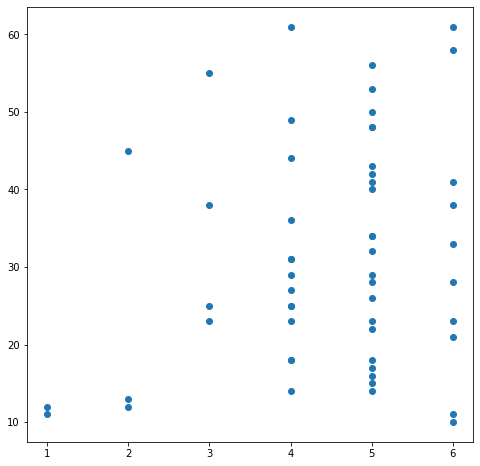

In [509]:
stats.pearsonr(relative_intellect, word_list)
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 8))
ax1.scatter(relative_intellect, word_list)

# Пункт б: проверка однородности

In [510]:
from scipy.stats import mannwhitneyu
from scipy.stats import anderson_ksamp


In [511]:
df.columns

Index(['Курс', 'Преобладающие в аттестате оценки', 'Средний балл за ЕГЭ',
       'Преобладающие в университете оценки', 'Возраст', 'Рост (см)',
       'Самооценка интеллекта', 'Самооценка словарного запаса',
       'Очки для зрения', 'Относительная оценка инттеллекта',
       'Цвет любимой футболки', 'Количество иностранных языков', '1 минута',
       '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'],
      dtype='object')

In [512]:
q_80 = df['Всего'].quantile(q=0.8)
q_60 = df['Всего'].quantile(q=0.6)
first_sample = df[df['Всего']>q_80]
second_sample = df[(df['Всего']<=q_80) & (df['Всего']>=q_60)]
third_sample = df[df['Всего']<q_60]
tmp_df = df.copy()
tmp_df['sample'] = 2
tmp_df.loc[df['Всего'] > q_80, 'sample'] = 1
tmp_df.loc[df['Всего'] < q_60, 'sample'] = 3
print(first_sample.shape,second_sample.shape,third_sample.shape)

(11, 18) (11, 18) (33, 18)


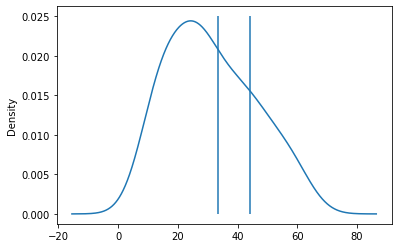

In [513]:
df['Всего'].plot.kde()
plt.vlines(q_80,0,0.025)
plt.vlines(q_60,0,0.025)
plt.show()

In [514]:
columns_for_check = ['Преобладающие в аттестате оценки', 'Средний балл за ЕГЭ',
       'Преобладающие в университете оценки','Самооценка интеллекта',
          'Самооценка словарного запаса','Очки для зрения',
          'Относительная оценка инттеллекта']

In [515]:
def Mannwhitneyu_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        print(f'Mannwhitneyu results for {column}:')
        print(f'\tFirst and Second samples p-value: {mannwhitneyu(first_sample[column].values,second_sample[column].values )[1]}')
        print(f'\tFirst and Third samples p-value: {mannwhitneyu(first_sample[column].values,third_sample[column].values )[1]}')
        print(f'\tThird and Second samples p-value: {mannwhitneyu(third_sample[column].values,second_sample[column].values )[1]}')
        print('-'*120)

def AD_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        print(f'3 sample Anderson-Darling results for {column}:')
        print(f'\tp-value: {anderson_ksamp([first_sample[column].values,second_sample[column].values, third_sample[column].values])[2]}')
        print('-'*120)
        


In [516]:

# ща будем искать смешные зависимости 
def displot_all(hue, df = df, cols=numer_columns, x_s=4, y_s=4):
    palette=sns.color_palette("husl", 3)
    fig, axes = plt.subplots(x_s,y_s,figsize=(7*x_s,7*y_s))
    c = 0
    for i in range(x_s):
        if c<len(cols):
            for j in range(y_s):
                if c<len(cols):
                    if cols[c]!=hue:
                        sns.histplot(df,x=cols[c], hue=hue, ax=axes[i][j],kde=True, stat='probability',common_norm=False,palette=palette)
                    else:
                        sns.histplot(df,x=cols[-1], hue=hue,ax=axes[i][j], kde=True, stat='probability',common_norm=False,palette=palette)
                    c+=1
                else:
                    break
        else:   
            break
    plt.savefig(hue+'.png')
    print('saved')
    
            

saved


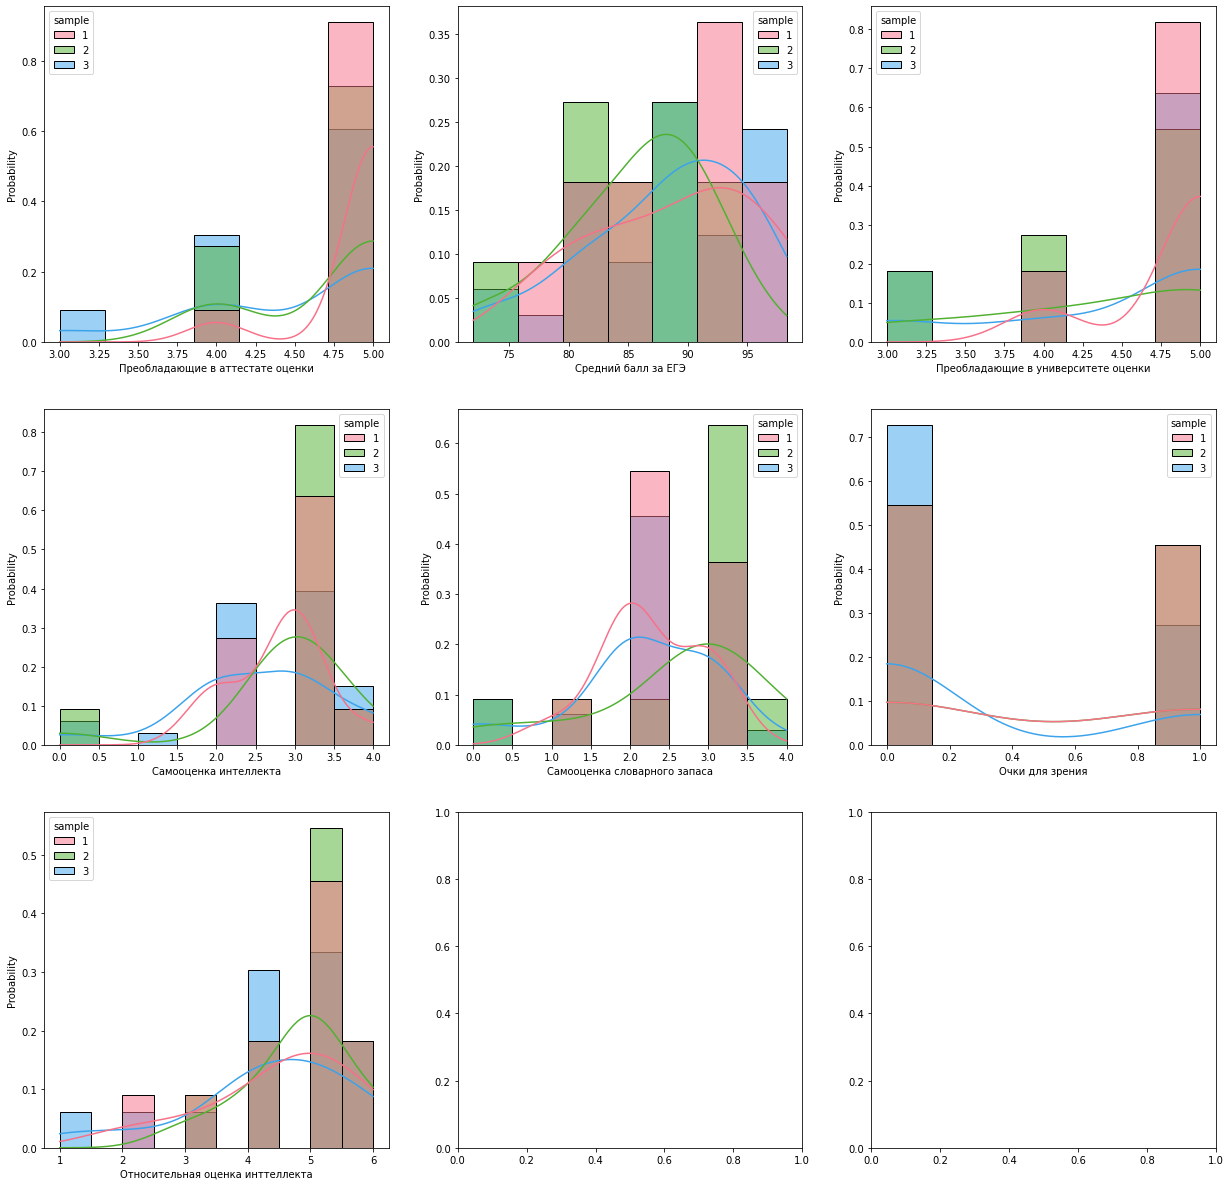

In [517]:
displot_all('sample',tmp_df, columns_for_check,3,3)

In [518]:
AD_check(columns_for_check)

3 sample Anderson-Darling results for Преобладающие в аттестате оценки:
	p-value: 0.07616560724968177
------------------------------------------------------------------------------------------------------------------------
3 sample Anderson-Darling results for Средний балл за ЕГЭ:
	p-value: 0.25
------------------------------------------------------------------------------------------------------------------------
3 sample Anderson-Darling results for Преобладающие в университете оценки:
	p-value: 0.25
------------------------------------------------------------------------------------------------------------------------
3 sample Anderson-Darling results for Самооценка интеллекта:
	p-value: 0.25
------------------------------------------------------------------------------------------------------------------------
3 sample Anderson-Darling results for Самооценка словарного запаса:
	p-value: 0.19720095987755482
----------------------------------------------------------------------------

In [519]:

Mannwhitneyu_check(columns_for_check)

Mannwhitneyu results for Преобладающие в аттестате оценки:
	First and Second samples p-value: 0.3025281916437321
	First and Third samples p-value: 0.06318927737702756
	Third and Second samples p-value: 0.4051337126367599
------------------------------------------------------------------------------------------------------------------------
Mannwhitneyu results for Средний балл за ЕГЭ:
	First and Second samples p-value: 0.3240892510141604
	First and Third samples p-value: 0.8176174902502804
	Third and Second samples p-value: 0.20673289263110817
------------------------------------------------------------------------------------------------------------------------
Mannwhitneyu results for Преобладающие в университете оценки:
	First and Second samples p-value: 0.14932385755084093
	First and Third samples p-value: 0.2039938128440072
	Third and Second samples p-value: 0.6850551127769036
---------------------------------------------------------------------------------------------------------

# Пункт в: проверка аппроксимации количества слов нормальным распределением

In [520]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import kstest
from scipy.stats import cramervonmises
from scipy.stats import jarque_bera
from statsmodels.stats.diagnostic import lilliefors

In [521]:
data_frame_temp = pd.read_csv('ADQuantiles.txt', sep=" ", names=['level', 'quantile'])
Level = np.array(data_frame_temp['level'])[1:]
Stat = np.array(data_frame_temp['quantile'])[1:]
Stat = Stat.astype('float64')
Level = Level.astype('float64')

In [522]:
def discrt(k,data,net):
  out=np.zeros(k)
  for i in data:
    for j in range(k):
      if(i>=net[j] and i<net[j+1]):
        out[j]=out[j]+1
  return out

In [523]:
def Stat_to_pvalue(stat):
    num = 0
    for i in np.arange(Stat.size):
        if(stat < Stat[i]):
            num = i
            break
    if(stat < Stat[0]):
        return 1 - Level[0]
    elif(stat > Stat[-1]):
        return 1 - Level[-1]
        
    if(abs(Stat[num] - stat) > abs(Stat[num - 1] - stat)):
        return 1 - Level[num - 1]
    else:
        return 1 - Level[num]

In [524]:
# def chisquare_norm_check(columns):
#     if type(columns)==str:
#         columns = [columns]
#     for column in columns:
#         print(f'chisquare norm results for {column}:')
#         print(f'\tchech norm aprox: {chisquare(third_sample[column].values,second_sample[column])[1]}')



In [525]:
def cramervonmises_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'cramervonmises norm results for {column}:')
        print(f'\tcheck for norm aprox with cramervonmises: {cramervonmises(data,"norm", args=(M, D)).pvalue}')
        print('-'*120)

In [526]:
def kstest_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'kstest norm results for {column}:')
        print(f'\tcheck for norm aprox with kstest: {kstest(data, "norm", (M, D), data.size)[1]}')
        print('-'*120)

In [527]:
def anderson_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'anderson norm results for {column}:')
        print(f'\tcheck for norm aprox with anderson: {Stat_to_pvalue(anderson((data - M)/D, "norm")[0])}')
        print('-'*120)

In [528]:
def lilliefors_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'{column}:')
        print(f'\tp-value: {lilliefors((data - M) / D, dist="norm")[1]}')
        print('-'*120)

In [529]:
def shapiro_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'{column}:')
        print(f'p-value: {shapiro((data - M)/D).pvalue}')
        print('-'*120)

In [530]:
def normaltest_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'normaltest norm results for {column}:')
        print(f'\tcheck for norm aprox with normaltest: {normaltest((data - M)/D).pvalue}')
        print('-'*120)

In [531]:
def cramervonmises_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'cramervonmises norm results for {column}:')
        print(f'\tcheck for norm aprox with cramervonmises: {cramervonmises(data,"norm", args=(M, D)).pvalue}')
        print('-'*120)

In [532]:
def jarque_bera_norm_check(columns):
    if type(columns)==str:
        columns = [columns]
    for column in columns:
        data = np.array(df[column])
        M = data.mean(), 
        D = data.std()
        print(f'jarque_bera norm results for {column}:')
        print(f'\tcheck for norm aprox with jarque_bera: {jarque_bera((data - M)/D).pvalue}')
        print('-'*120)

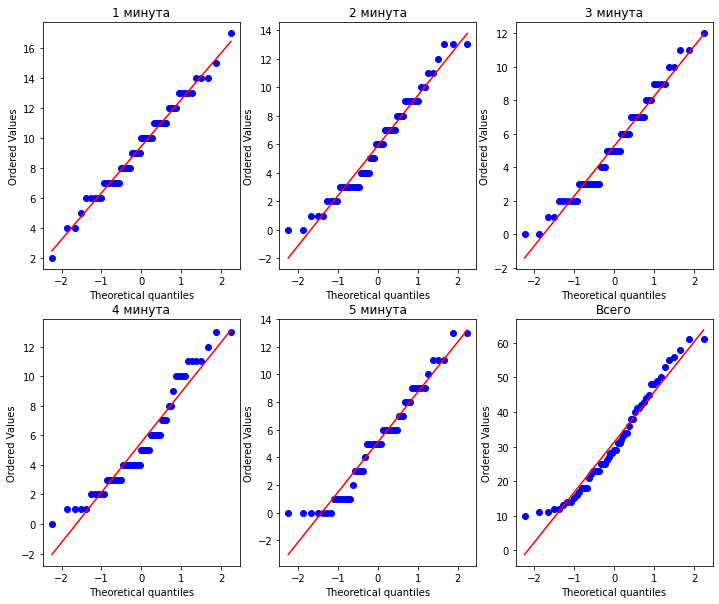

In [533]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))


stats.probplot(df['1 минута'], dist='norm', plot=axes[0][0])
axes[0][0].set_title('1 минута')
stats.probplot(df['2 минута'], dist='norm', plot=axes[0][1])
axes[0][1].set_title('2 минута')
stats.probplot(df['3 минута'], dist='norm', plot=axes[0][2])
axes[0][2].set_title('3 минута')
stats.probplot(df['4 минута'], dist='norm', plot=axes[1][0])
axes[1][0].set_title('4 минута')
stats.probplot(df['5 минута'], dist='norm', plot=axes[1][1])
axes[1][1].set_title('5 минута')
stats.probplot(df['Всего'], dist='norm', plot=axes[1][2])
axes[1][2].set_title('Всего')
plt.savefig('probplot.png')

In [534]:
kstest_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

kstest norm results for 1 минута:
	check for norm aprox with kstest: 0.7777787210104237
------------------------------------------------------------------------------------------------------------------------
kstest norm results for 2 минута:
	check for norm aprox with kstest: 0.3173118181347273
------------------------------------------------------------------------------------------------------------------------
kstest norm results for 3 минута:
	check for norm aprox with kstest: 0.18977103786002347
------------------------------------------------------------------------------------------------------------------------
kstest norm results for 4 минута:
	check for norm aprox with kstest: 0.08890426125309825
------------------------------------------------------------------------------------------------------------------------
kstest norm results for 5 минута:
	check for norm aprox with kstest: 0.30181479191803806
-------------------------------------------------------------------------

In [535]:
cramervonmises_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

cramervonmises norm results for 1 минута:
	check for norm aprox with cramervonmises: 0.8101385941057555
------------------------------------------------------------------------------------------------------------------------
cramervonmises norm results for 2 минута:
	check for norm aprox with cramervonmises: 0.5394959961286889
------------------------------------------------------------------------------------------------------------------------
cramervonmises norm results for 3 минута:
	check for norm aprox with cramervonmises: 0.521559834478249
------------------------------------------------------------------------------------------------------------------------
cramervonmises norm results for 4 минута:
	check for norm aprox with cramervonmises: 0.19436834939276748
------------------------------------------------------------------------------------------------------------------------
cramervonmises norm results for 5 минута:
	check for norm aprox with cramervonmises: 0.5044183495819

In [536]:
anderson_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

anderson norm results for 1 минута:
	check for norm aprox with anderson: 0.901
------------------------------------------------------------------------------------------------------------------------
anderson norm results for 2 минута:
	check for norm aprox with anderson: 0.5920000000000001
------------------------------------------------------------------------------------------------------------------------
anderson norm results for 3 минута:
	check for norm aprox with anderson: 0.5900000000000001
------------------------------------------------------------------------------------------------------------------------
anderson norm results for 4 минута:
	check for norm aprox with anderson: 0.19999999999999996
------------------------------------------------------------------------------------------------------------------------
anderson norm results for 5 минута:
	check for norm aprox with anderson: 0.45899999999999996
-------------------------------------------------------------------

In [537]:
lilliefors_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

1 минута:
	p-value: 0.4494512199558001
------------------------------------------------------------------------------------------------------------------------
2 минута:
	p-value: 0.03990964126193636
------------------------------------------------------------------------------------------------------------------------
3 минута:
	p-value: 0.00984301963686562
------------------------------------------------------------------------------------------------------------------------
4 минута:
	p-value: 0.0012672128860568837
------------------------------------------------------------------------------------------------------------------------
5 минута:
	p-value: 0.036309777625725535
------------------------------------------------------------------------------------------------------------------------
Всего:
	p-value: 0.371436408430918
------------------------------------------------------------------------------------------------------------------------


In [538]:
shapiro_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

1 минута:
p-value: 0.8312331438064575
------------------------------------------------------------------------------------------------------------------------
2 минута:
p-value: 0.06731298565864563
------------------------------------------------------------------------------------------------------------------------
3 минута:
p-value: 0.12502291798591614
------------------------------------------------------------------------------------------------------------------------
4 минута:
p-value: 0.0035154579672962427
------------------------------------------------------------------------------------------------------------------------
5 минута:
p-value: 0.015239374712109566
------------------------------------------------------------------------------------------------------------------------
Всего:
p-value: 0.031244533136487007
------------------------------------------------------------------------------------------------------------------------


In [539]:
normaltest_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

normaltest norm results for 1 минута:
	check for norm aprox with normaltest: 0.9886578018624264
------------------------------------------------------------------------------------------------------------------------
normaltest norm results for 2 минута:
	check for norm aprox with normaltest: 0.19450154876730544
------------------------------------------------------------------------------------------------------------------------
normaltest norm results for 3 минута:
	check for norm aprox with normaltest: 0.3057894485636871
------------------------------------------------------------------------------------------------------------------------
normaltest norm results for 4 минута:
	check for norm aprox with normaltest: 0.09586016618790663
------------------------------------------------------------------------------------------------------------------------
normaltest norm results for 5 минута:
	check for norm aprox with normaltest: 0.2609155647898097
----------------------------------

In [540]:
jarque_bera_norm_check(['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])

jarque_bera norm results for 1 минута:
	check for norm aprox with jarque_bera: 0.9089064744977107
------------------------------------------------------------------------------------------------------------------------
jarque_bera norm results for 2 минута:
	check for norm aprox with jarque_bera: 0.3285751571741484
------------------------------------------------------------------------------------------------------------------------
jarque_bera norm results for 3 минута:
	check for norm aprox with jarque_bera: 0.3787631036106788
------------------------------------------------------------------------------------------------------------------------
jarque_bera norm results for 4 минута:
	check for norm aprox with jarque_bera: 0.11872641178804366
------------------------------------------------------------------------------------------------------------------------
jarque_bera norm results for 5 минута:
	check for norm aprox with jarque_bera: 0.3909371334486731
-------------------------

# Пункт г) Провести двухфакторный анализ числа слов в раунде по факторам человек и номер раунда

In [39]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
df_g = df.loc[df.index.repeat(5)]

tmp = [1, 2, 3, 4, 5]*df.shape[0]
df_g['минута'] = tmp

tmp_a = []
for i in range(df.shape[0]):
    tmp_a.append(df.loc[i, '1 минута'])
    tmp_a.append(df.loc[i, '2 минута'])
    tmp_a.append(df.loc[i, '3 минута'])
    tmp_a.append(df.loc[i, '4 минута'])
    tmp_a.append(df.loc[i, '5 минута'])
df_g['количество слов'] = tmp_a

df_g = df_g.drop(columns = ['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего'])
df_g.columns = ['course', 'school_marks', 'ege',
       'university_marks', 'age', 'height',
       'int', 'erudition',
       'goggles', 'relative_int', 'shirt_color',
        'foreign_languages', 'minute', 'words']

In [55]:
df_g['personal_number']=np.repeat(np.arange(1,df.shape[0]+1),5)
df_g

,course,school_marks,ege,university_marks,age,height,int,erudition,goggles,relative_int,shirt_color,foreign_languages,minute,words,personal_number
0,2,5,81.0,3,19,159,2,2,0,4,Розовый,3,1,9,1
0,2,5,81.0,3,19,159,2,2,0,4,Розовый,3,2,9,1
0,2,5,81.0,3,19,159,2,2,0,4,Розовый,3,3,6,1
0,2,5,81.0,3,19,159,2,2,0,4,Розовый,3,4,3,1
0,2,5,81.0,3,19,159,2,2,0,4,Розовый,3,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,4,5,86.0,5,21,162,3,2,1,5,Серый,1,1,14,55
54,4,5,86.0,5,21,162,3,2,1,5,Серый,1,2,10,55
54,4,5,86.0,5,21,162,3,2,1,5,Серый,1,3,9,55
54,4,5,86.0,5,21,162,3,2,1,5,Серый,1,4,10,55


In [42]:

df_g['minute'].shape

(275,)

In [50]:
df_g[df_g['personal_number']<100].shape

(275, 15)

In [37]:
def two_way_anova(attribute):
    model = ols('words ~ C(' + attribute + ') + C(minute) + C(' + attribute + '):C(minute)', data=df_g).fit()
    print(sm.stats.anova_lm(model, typ=2))

In [59]:
def two_way_anova_plot(attribute):
    model = ols('words ~ C(' + attribute + ') + C(minute)', data=df_g).fit()
    print(sm.stats.anova_lm(model, typ=2))
    fig, axes = plt.subplots(figsize=(10,8))
    res = model.resid 
    fig = sm.qqplot(res, line='s',ax=axes)
    plt.show()

In [594]:
def displot_all_anova(df = df, cols=numer_columns, x_s=4, y_s=4):
    palette=sns.color_palette("husl", 3)
    fig, axes = plt.subplots(x_s,y_s,figsize=(7*x_s,7*y_s))
    c = 0
    for i in range(x_s):
        if c<len(cols):
            for j in range(y_s):
                if c<len(cols):
                    model = ols('words ~ C(' + cols[c] + ') + C(minute) + C(' + cols[c] + '):C(minute)', data=df_g).fit()
                    res = model.resid 
                    fig = sm.qqplot(res, line='s', ax=axes[i][j])
                    axes[i][j].set_title(cols[c])
                    c+=1
                else:
                    break
        else:   
            break
    plt.savefig('anova.png')
    print('saved')

saved


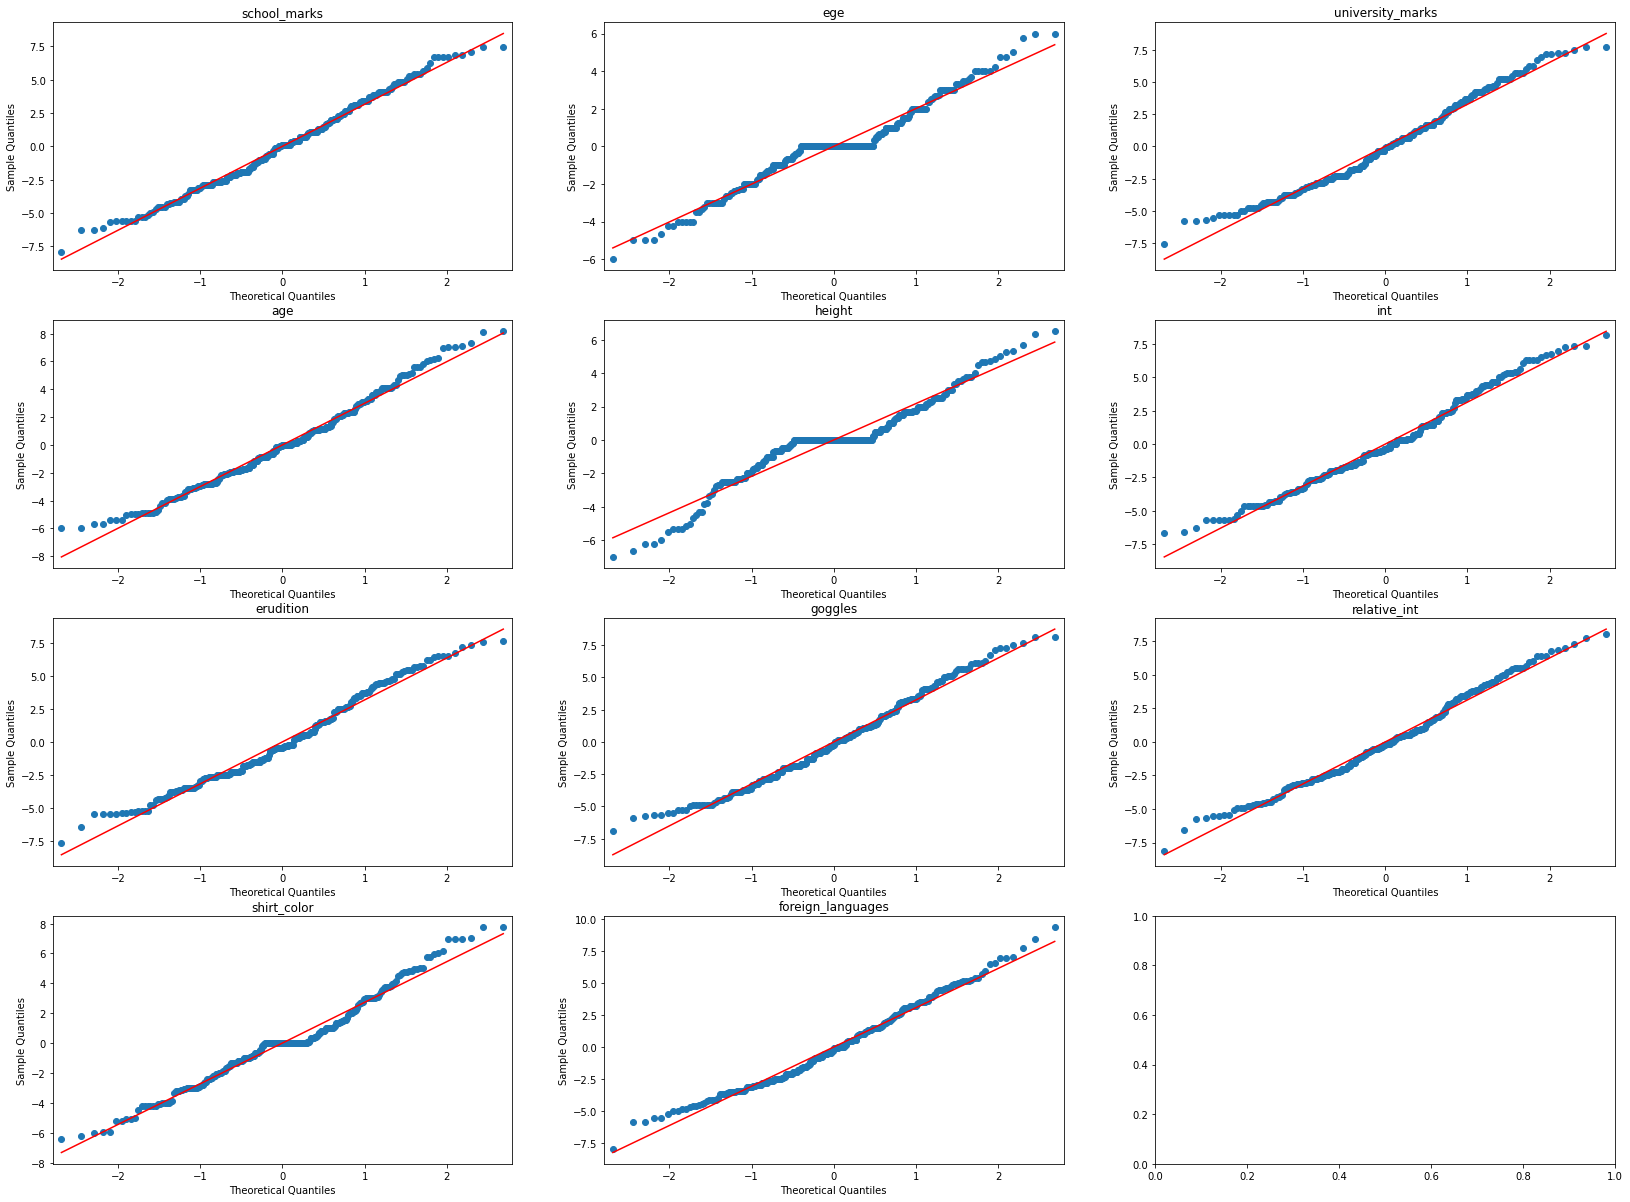

In [595]:
displot_all_anova(df=df_g, cols=['school_marks', 'ege',
       'university_marks', 'age', 'height',
       'int', 'erudition',
       'goggles', 'relative_int', 'shirt_color',
        'foreign_languages'], y_s=3)

                         sum_sq     df          F        PR(>F)
C(personal_number)  2238.385455   54.0  12.275888  3.959476e-42
C(minute)            735.440000    4.0  54.450148  1.085923e-31
Residual             729.360000  216.0        NaN           NaN


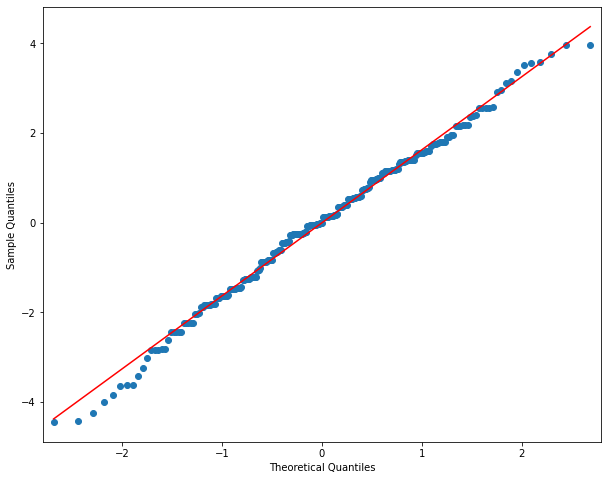

In [60]:
two_way_anova_plot('personal_number')

In [575]:
two_way_anova_plot('ege')

                       sum_sq     df          F        PR(>F)
C(ege)            1498.192121   29.0   5.797748  1.566089e-12
C(minute)          735.440000    4.0  20.633697  4.479715e-13
C(ege):C(minute)   355.720000  116.0   0.344144  1.000000e+00
Residual          1113.833333  125.0        NaN           NaN


In [576]:
two_way_anova_plot('university_marks')

                                    sum_sq     df          F        PR(>F)
C(university_marks)              34.595556    2.0   1.541338  2.160442e-01
C(minute)                       735.440000    4.0  16.383054  5.538711e-12
C(university_marks):C(minute)    15.281212    8.0   0.170206  9.946117e-01
Residual                       2917.868687  260.0        NaN           NaN


In [577]:
two_way_anova_plot('age')

                       sum_sq     df          F        PR(>F)
C(age)             415.247219    6.0   6.730408  1.326881e-06
C(minute)          735.440000    4.0  17.880233  7.286052e-13
C(age):C(minute)    84.610980   24.0   0.342848  9.985475e-01
Residual          2467.887255  240.0        NaN           NaN


In [578]:
two_way_anova_plot('height')

                          sum_sq     df          F        PR(>F)
C(height)            1256.252121   28.0   4.462016  2.524273e-09
C(minute)             735.440000    4.0  18.285197  6.122822e-12
C(height):C(minute)   404.326667  112.0   0.359027  1.000000e+00
Residual             1307.166667  130.0        NaN           NaN


In [556]:
two_way_anova_plot('int')

                       sum_sq     df          F        PR(>F)
C(int)             201.085750    4.0   4.601835  1.331152e-03
C(minute)          735.440000    4.0  16.830497  3.123360e-12
C(int):C(minute)    35.605517   16.0   0.203707  9.996627e-01
Residual          2731.054187  250.0        NaN           NaN


In [557]:
two_way_anova('erudition')

                             sum_sq     df          F        PR(>F)
C(erudition)             127.070040    4.0   2.834714  2.510561e-02
C(minute)                735.440000    4.0  16.406402  5.986590e-12
C(erudition):C(minute)    39.025217   16.0   0.217646  9.994827e-01
Residual                2801.650198  250.0        NaN           NaN


In [558]:
two_way_anova('goggles')

                           sum_sq     df          F        PR(>F)
C(goggles)              44.341010    1.0   4.038183  4.549544e-02
C(minute)              735.440000    4.0  16.744325  2.993656e-12
C(goggles):C(minute)    13.588655    4.0   0.309383  8.715865e-01
Residual              2909.815789  265.0        NaN           NaN


In [559]:
two_way_anova('relative_int')

                                sum_sq     df          F        PR(>F)
C(relative_int)             225.332511    5.0   4.094898  1.372399e-03
C(minute)                   735.440000    4.0  16.706155  4.019935e-12
C(relative_int):C(minute)    46.059481   20.0   0.209256  9.999160e-01
Residual                   2696.353463  245.0        NaN           NaN


In [560]:
two_way_anova('foreign_languages')

                                     sum_sq     df          F        PR(>F)
C(foreign_languages)             313.204026    4.0   7.584192  8.803736e-06
C(minute)                        735.440000    4.0  17.808578  7.045782e-13
C(foreign_languages):C(minute)    73.481905   16.0   0.444839  9.689363e-01
Residual                        2581.059524  250.0        NaN           NaN


In [561]:
stats.friedmanchisquare(df_g['words'], df_g['university_marks'], df_g['minute'])

FriedmanchisquareResult(statistic=146.65045592705158, pvalue=1.4297434352755962e-32)

In [275]:
!pip install scikit_posthocs
import scikit_posthocs as sp

     |████████████████████████████████| 43 kB 2.3 MB/s             
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ done
  Preparing metadata (pyproject.toml) ... - \ | done
  Created wheel for scikit-posthocs: filename=scikit_posthocs-0.6.7-py3-none-any.whl size=37903 sha256=a28575c81de74d2a2882f6f588f900b8963a71056bd4b3216e565f731fc6e314
  Stored in directory: /home/datalore/.cache/pip/wheels/59/a1/76/8954a8efb2e143534be5943de94a245c673b25b9ce71c3aab3
Successfully built scikit-posthocs
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [416]:
def posthoc(attribute):
    x = []
    for i in range(df.shape[0]):
        t = [df.loc[i, '1 минута'], 1, df.loc[i, attribute]]
        x.append(t)
        t = [df.loc[i, '2 минута'], 2, df.loc[i, attribute]]
        x.append(t)
        t = [df.loc[i, '3 минута'], 3, df.loc[i, attribute]]
        x.append(t)
        t = [df.loc[i, '4 минута'], 4, df.loc[i, attribute]]
        x.append(t)
        t = [df.loc[i, '5 минута'], 5, df.loc[i, attribute]]
        x.append(t)
    print(sp.posthoc_conover_friedman(x))

In [424]:
for atr in ['Преобладающие в аттестате оценки', 'Средний балл за ЕГЭ',
       'Преобладающие в университете оценки', 'Возраст', 'Рост (см)',
       'Самооценка интеллекта', 'Самооценка словарного запаса',
       'Очки для зрения', 'Относительная оценка инттеллекта',
        'Количество иностранных языков']:
    posthoc(atr)

              0             1             2
0  1.000000e+00  1.602477e-29  9.264011e-03
1  1.602477e-29  1.000000e+00  1.957152e-19
2  9.264011e-03  1.957152e-19  1.000000e+00
              0             1             2
0  1.000000e+00  6.804737e-09  1.791661e-42
1  6.804737e-09  1.000000e+00  2.754985e-71
2  1.791661e-42  2.754985e-71  1.000000e+00
              0             1             2
0  1.000000e+00  4.861339e-28  4.729315e-03
1  4.861339e-28  1.000000e+00  2.090136e-17
2  4.729315e-03  2.090136e-17  1.000000e+00
              0             1             2
0  1.000000e+00  6.804737e-09  1.791661e-42
1  6.804737e-09  1.000000e+00  2.754985e-71
2  1.791661e-42  2.754985e-71  1.000000e+00
              0             1             2
0  1.000000e+00  6.804737e-09  1.791661e-42
1  6.804737e-09  1.000000e+00  2.754985e-71
2  1.791661e-42  2.754985e-71  1.000000e+00
              0             1             2
0  1.000000e+00  1.790020e-19  3.127707e-29
1  1.790020e-19  1.000000e+00  1

In [410]:
sp.posthoc_conover(df_g, val_col='words', group_col='minute')

,1,2,3,4,5
1,1.000000e+00,1.115185e-07,5.784654e-10,3.070393e-09,1.594604e-10
2,1.115185e-07,1.000000e+00,3.300160e-01,4.981079e-01,2.315402e-01
3,5.784654e-10,3.300160e-01,1.000000e+00,7.663468e-01,8.235036e-01
4,3.070393e-09,4.981079e-01,7.663468e-01,1.000000e+00,6.029925e-01
5,1.594604e-10,2.315402e-01,8.235036e-01,6.029925e-01,1.000000e+00


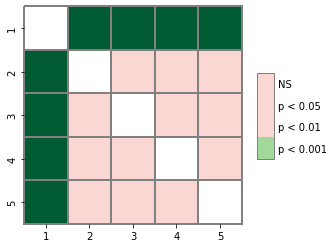

In [407]:
pc = sp.posthoc_conover(df_g, val_col='words', group_col='minute')
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)

In [0]:
res = model.resid 
fig = sm.qqplot(res, 's')
plt.show()

# Преколы

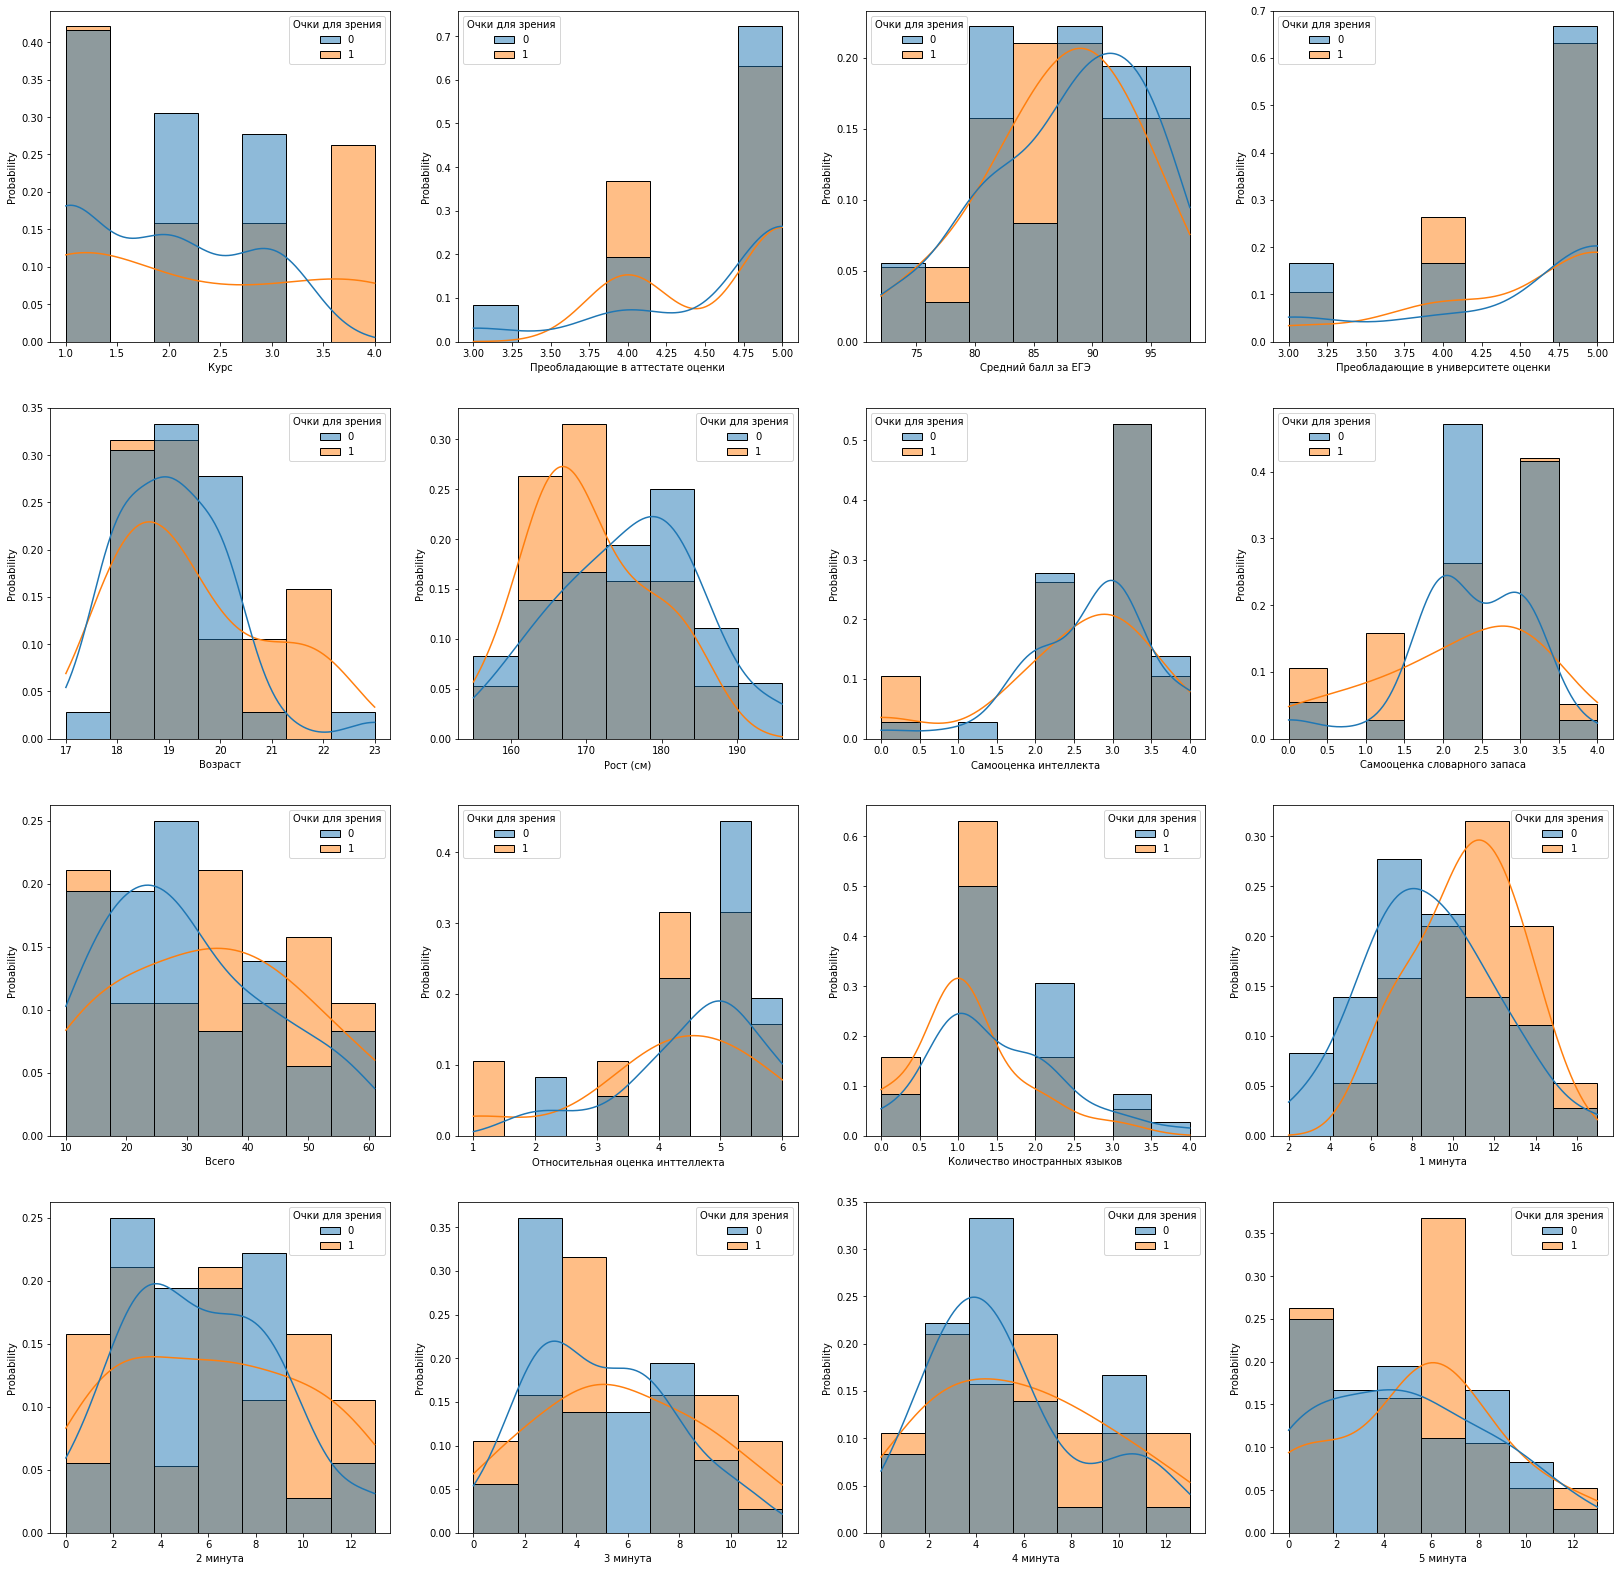

In [57]:
displot_all('Очки для зрения') # Cтрашно

In [0]:
displot_all('Очки для зрения',) # Cтрашно

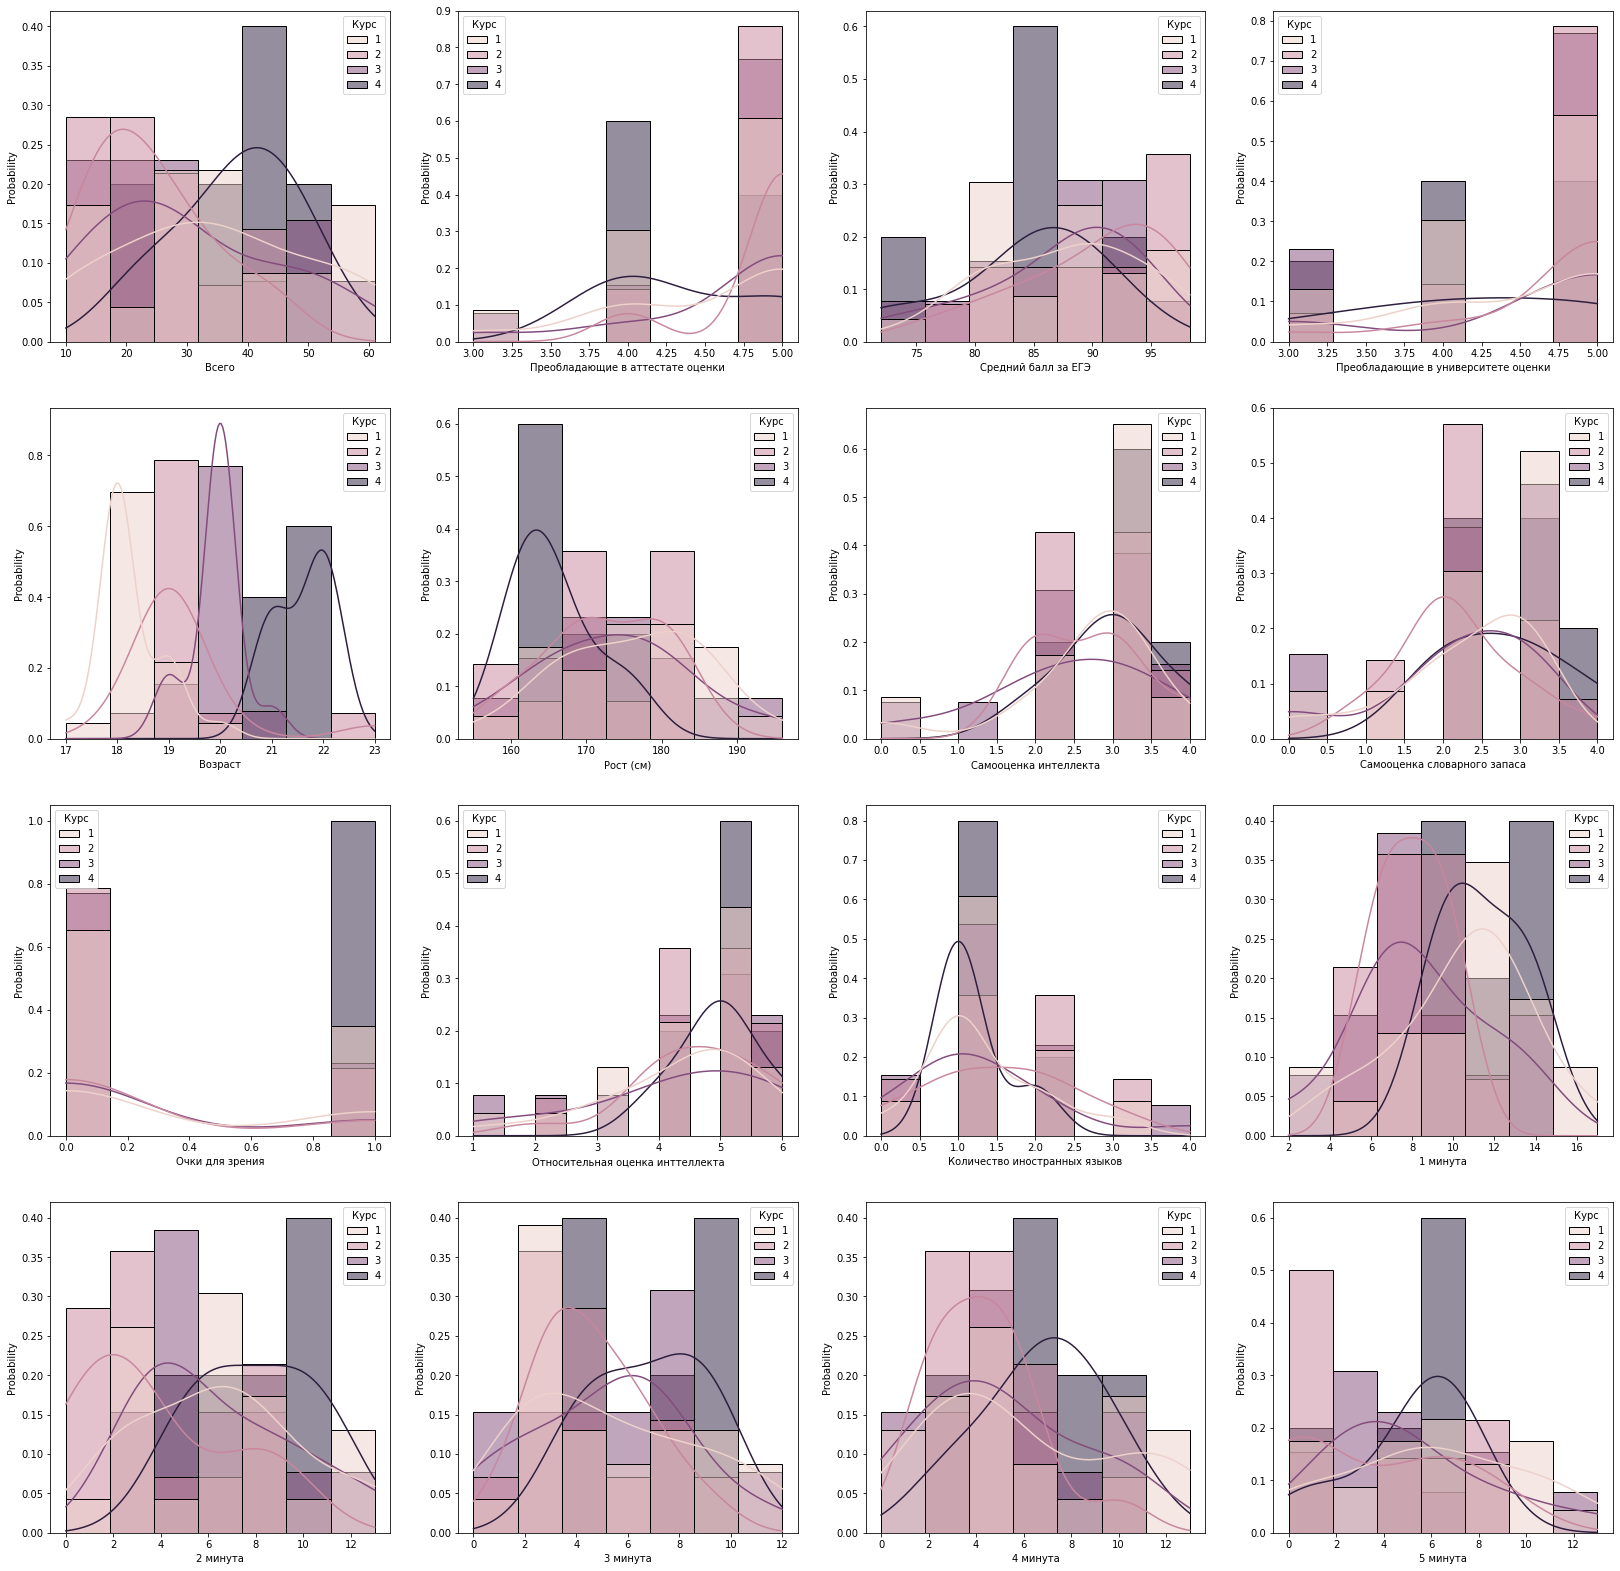

In [58]:
displot_all('Курс') 

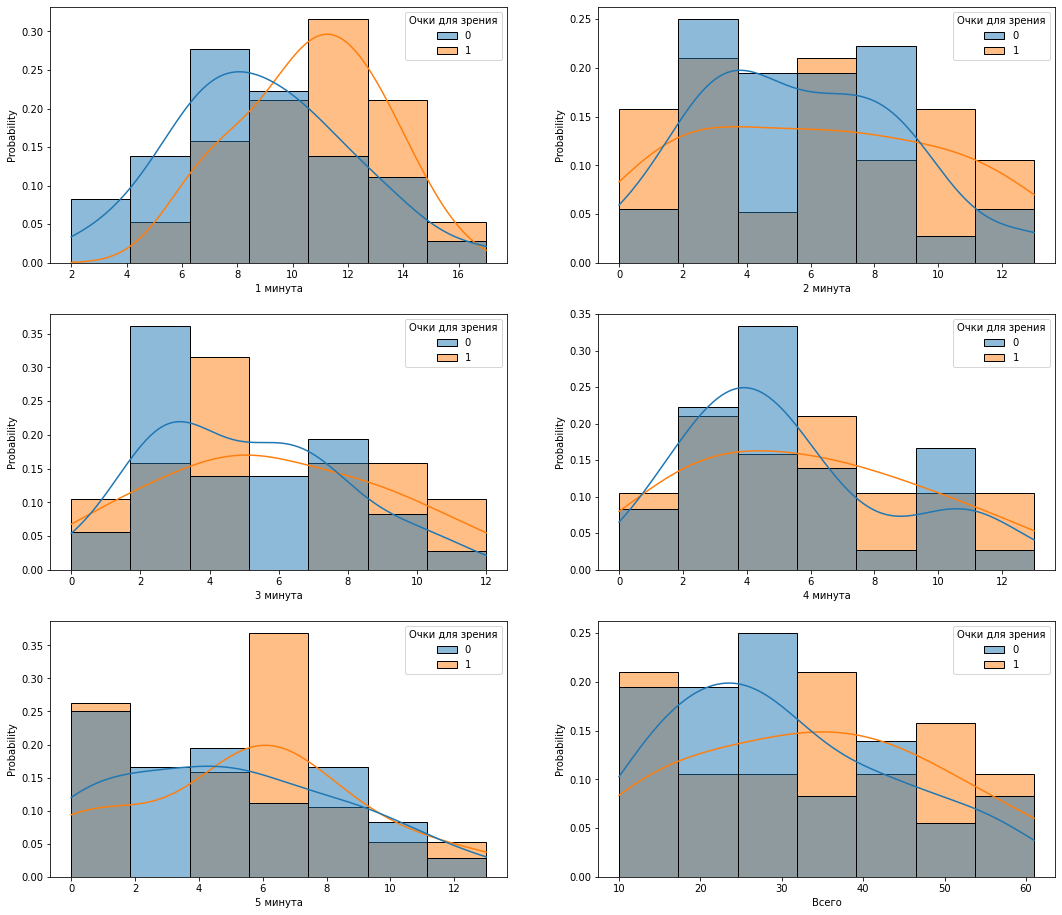

In [602]:
fig, axes = plt.subplots(3,2,figsize=(18,16))
mins = ['1 минута', '2 минута', '3 минута', '4 минута', '5 минута', 'Всего']
c=0
for i in range(3):
    for j in range(2):
        sns.histplot(df,x=mins[c], hue='Очки для зрения', ax=axes[i][j],kde=True, stat='probability',common_norm=False)
        c+=1
plt.savefig('glasses-words.png')

In [600]:
minutes_glasses = np.array([df[df['Очки для зрения'] ==  1]['1 минута'],
                            df[df['Очки для зрения'] ==  1]['2 минута'], 
                            df[df['Очки для зрения'] ==  1]['3 минута'], 
                            df[df['Очки для зрения'] ==  1]['4 минута'], 
                            df[df['Очки для зрения'] ==  1]['5 минута'], 
                            df[df['Очки для зрения'] ==  1]['Всего']])
minutes_noglasses = np.array([df[df['Очки для зрения'] ==  0]['1 минута'],
                            df[df['Очки для зрения'] ==  0]['2 минута'], 
                            df[df['Очки для зрения'] ==  0]['3 минута'], 
                            df[df['Очки для зрения'] ==  0]['4 минута'], 
                            df[df['Очки для зрения'] ==  0]['5 минута'], 
                            df[df['Очки для зрения'] ==  0]['Всего']])